In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Overview</h1>

In [58]:
df = pd.read_csv('train.csv')

numRows, numCols = df.shape

print(f"Number of rows: {numRows}")
print(f"Number of columns: {numCols}")

print(30 * "-")
print("Total number of missing values")
print(30 * "-")
missingValues = df.isna().sum()
print(missingValues)
print(30 * "-")

totalMissingValues = missingValues.sum()
print("Total missing values:", totalMissingValues)
print(30 * "-")


percentMissing = (missingValues / numRows) * 100
print("Percentage of missing data:")
print(percentMissing)
print(30 * "-")


total_percent_missing = (total_missing_values / (numRows * numCols)) * 100
print("Total percentage of missing data:", total_percent_missing)
print(30 * "-")


Number of rows: 891
Number of columns: 12
------------------------------
Total number of missing values
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Total missing values: 866
------------------------------
Percentage of missing data:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
------------------------------
Total percentage of missing data: 8.099513655069211
------------------------------


<h1>Passenger Demographics</h1>

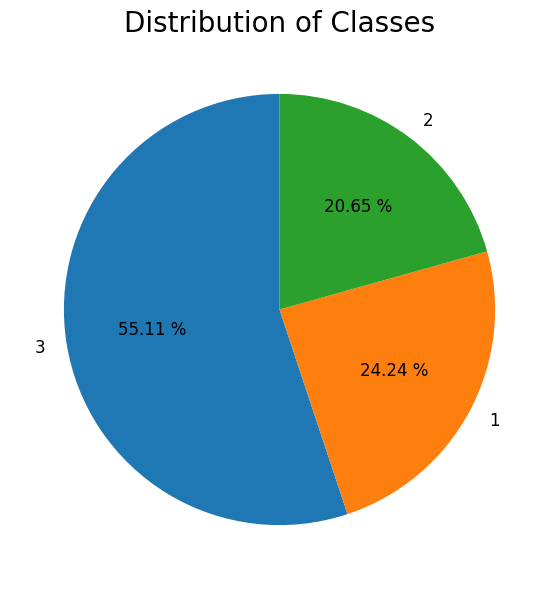

In [59]:
pClass=df['Pclass'].unique()
countList = [(df.Pclass == x).sum() for x in pClass]
labelList = list(pClass)

plt.figure(figsize = (10,7))
plt.pie(countList, labels = labelList, autopct = "%.2f %%", startangle = 90, textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()



Summary Statistics for Age:
Mean Age: 29.70
Median Age: 28.00
Standard Deviation: 14.53
Minimum Age: 0.42
Maximum Age: 80.0


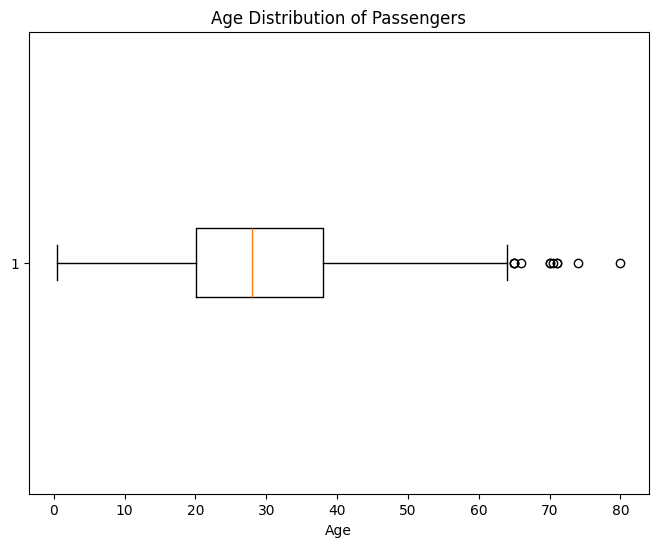

In [60]:
age_data = df['Age'].dropna()

mean_age = age_data.mean()
median_age = age_data.median()
std_age = age_data.std()
min_age = age_data.min()
max_age = age_data.max()

print("Summary Statistics for Age:")
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation: {std_age:.2f}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

plt.figure(figsize=(8, 6))
plt.boxplot(age_data, vert=False)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

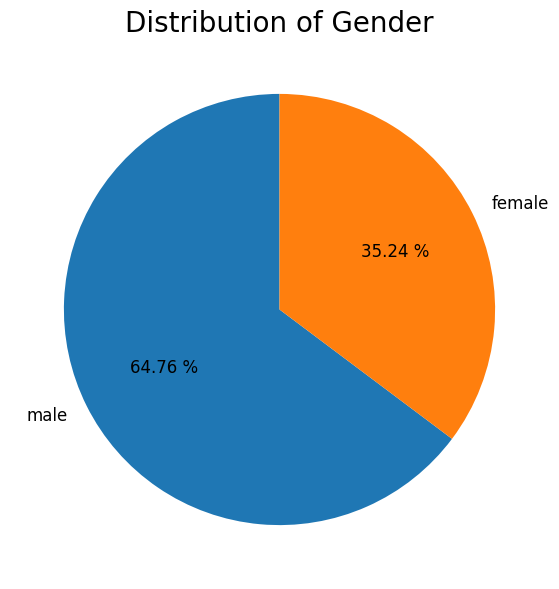

In [61]:
Sex=df['Sex'].unique()
countList = [(df.Sex == x).sum() for x in Sex]
labelList = list(Sex)

plt.figure(figsize = (10,7))
plt.pie(countList, labels = labelList, autopct = "%.2f %%", startangle = 90, textprops = {'fontsize': 12})
plt.title('Distribution of Gender', fontsize = 20)
plt.show()

<h1>Survival Analysis</h1>

In [62]:
survived_count = df['Survived'].sum()
total_passengers = df.shape[0]
survival_rate = survived_count / total_passengers

print(f"Overall survival rate of passengers: {survival_rate:.2%}")

Overall survival rate of passengers: 38.38%


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


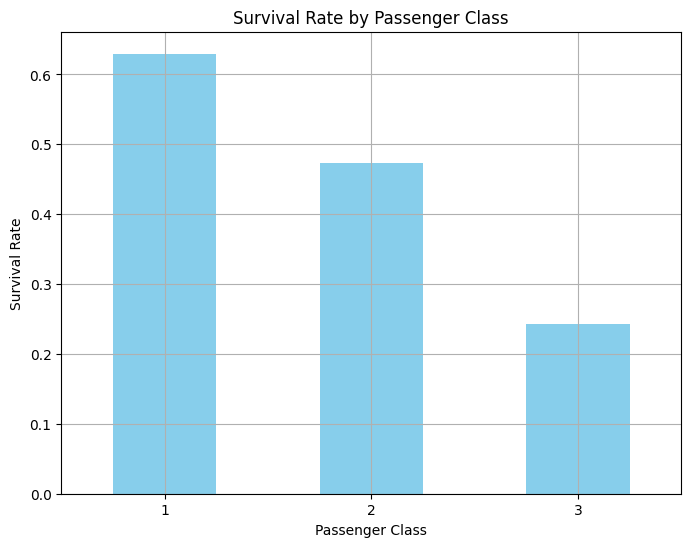

In [63]:
survival_rates = df.groupby('Pclass')['Survived'].mean()

print("Survival Rate by Passenger Class:")
print(survival_rates)

plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


C:\Users\larai\AppData\Local\Temp\ipykernel_7976\3105277213.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Range')['Survived'].mean().plot(kind='bar', ax=axs[0], color='skyblue')
C:\Users\larai\AppData\Local\Temp\ipykernel_7976\3105277213.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fare Range')['Survived'].mean().plot(kind='bar', ax=axs[1], color='orange')


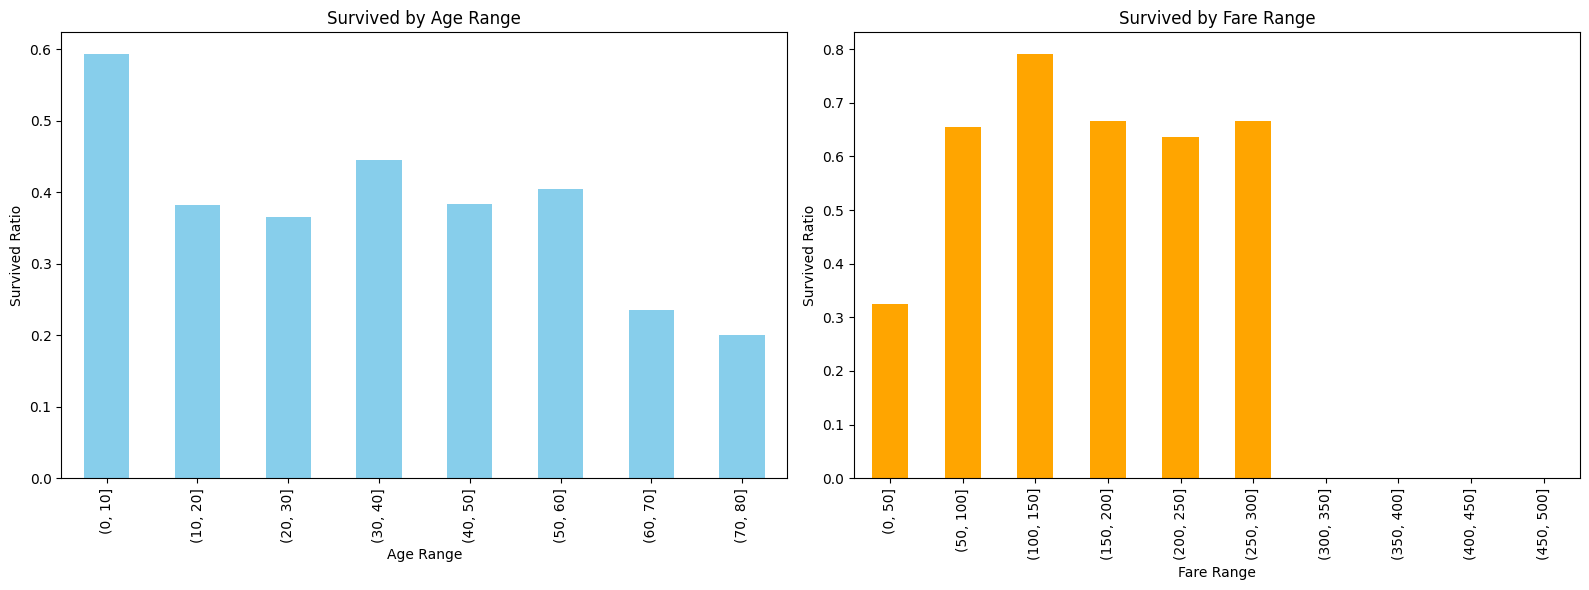

In [102]:

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

df['Age Range'] = pd.cut(df['Age'], bins=age_bins)
df['Fare Range'] = pd.cut(df['Fare'], bins=fare_bins)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

df.groupby('Age Range')['Survived'].mean().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Survived by Age Range')
axs[0].set_xlabel('Age Range')
axs[0].set_ylabel('Survived Ratio')

df.groupby('Fare Range')['Survived'].mean().plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Survived by Fare Range')
axs[1].set_xlabel('Fare Range')
axs[1].set_ylabel('Survived Ratio')

plt.tight_layout()
plt.show()


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


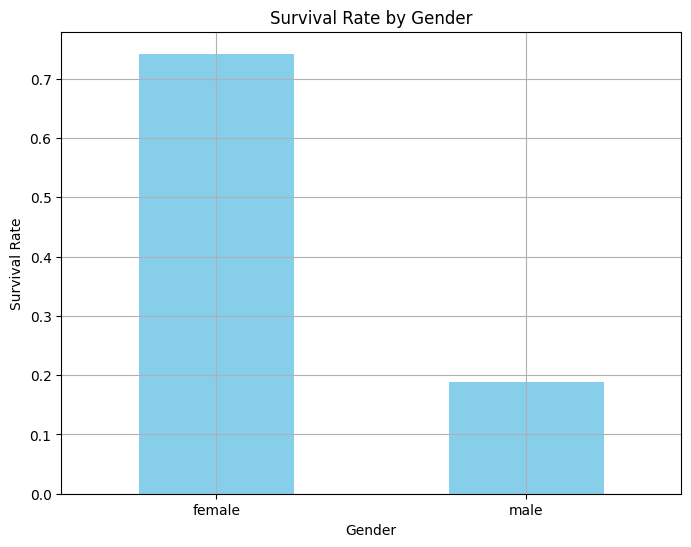

In [103]:
survival_rates = df.groupby('Sex')['Survived'].mean()

print("Survival Rate by Gender:")
print(survival_rates)

plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Survival Rate by Number of Family Members:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


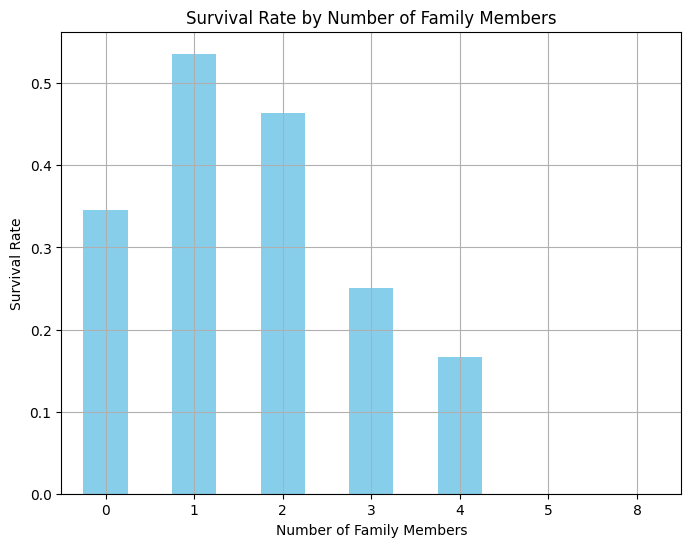

In [104]:
survival_rates = df.groupby('SibSp')['Survived'].mean()

print("Survival Rate by Number of Family Members:")
print(survival_rates)

plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Number of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

<h1>Ticket Fare and Cabin</h1>

Summary Statistics for Ticket Fares:
Mean Fare: 32.20
Median Fare: 14.45
Standard Deviation: 49.69
Minimum Fare: 0.0
Maximum Fare: 512.3292


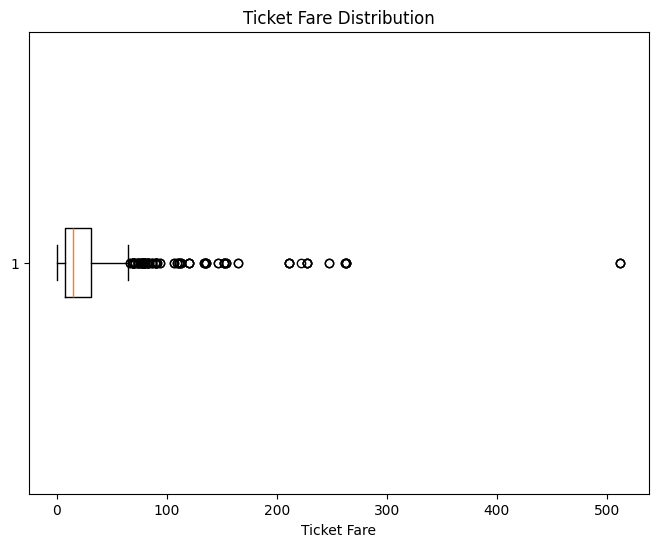

In [105]:
fare_data = df['Fare'].dropna()

mean_fare = fare_data.mean()
median_fare = fare_data.median()
std_fare = fare_data.std()
min_fare = fare_data.min()
max_fare = fare_data.max()

print("Summary Statistics for Ticket Fares:")
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"Standard Deviation: {std_fare:.2f}")
print(f"Minimum Fare: {min_fare}")
print(f"Maximum Fare: {max_fare}")

# Box plot to visualize the distribution of ages
plt.figure(figsize=(8, 6))
plt.boxplot(fare_data, vert=False)
plt.title('Ticket Fare Distribution')
plt.xlabel('Ticket Fare')
plt.show()

Correlation coefficient between passenger class and ticket fare: -0.5494996199439082


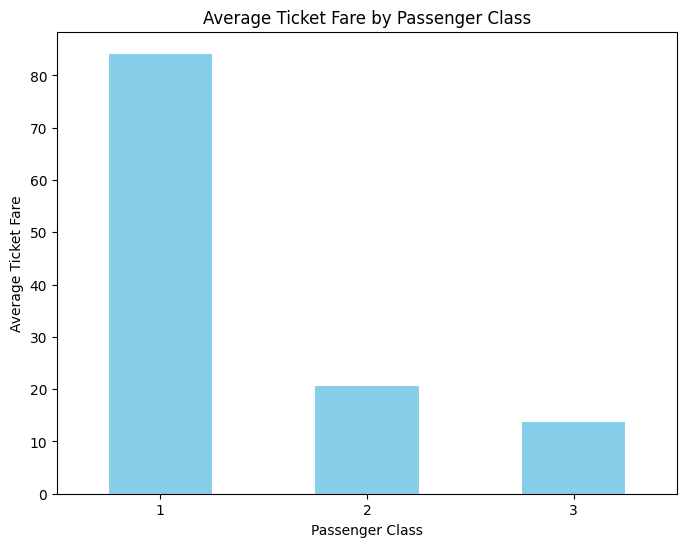

In [106]:
correlation = df['Pclass'].corr(df['Fare'])
print("Correlation coefficient between passenger class and ticket fare:", correlation)


fare_by_class = df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
fare_by_class.plot(kind='bar', color='skyblue')
plt.title('Average Ticket Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Ticket Fare')
plt.xticks(rotation=0)
plt.show()


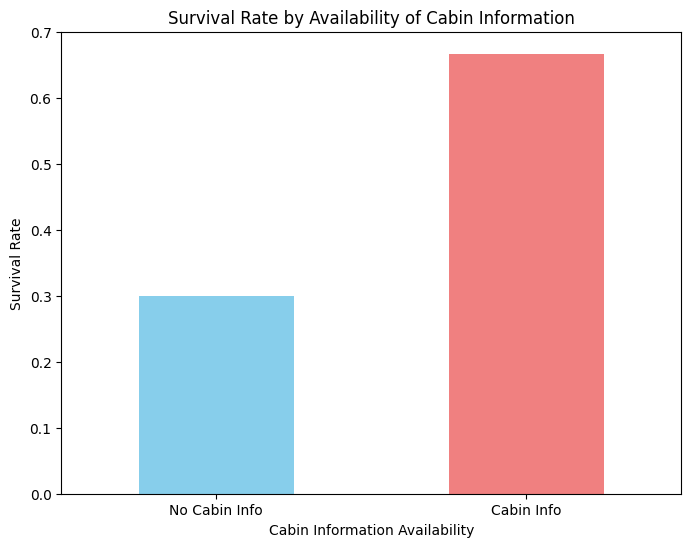

In [107]:
survival_rates = df.groupby(df['Cabin'].notnull())['Survived'].mean()

plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Availability of Cabin Information')
plt.xlabel('Cabin Information Availability')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['No Cabin Info', 'Cabin Info'], rotation=0)
plt.show()

<h1>
Embarkation Port

</h1>

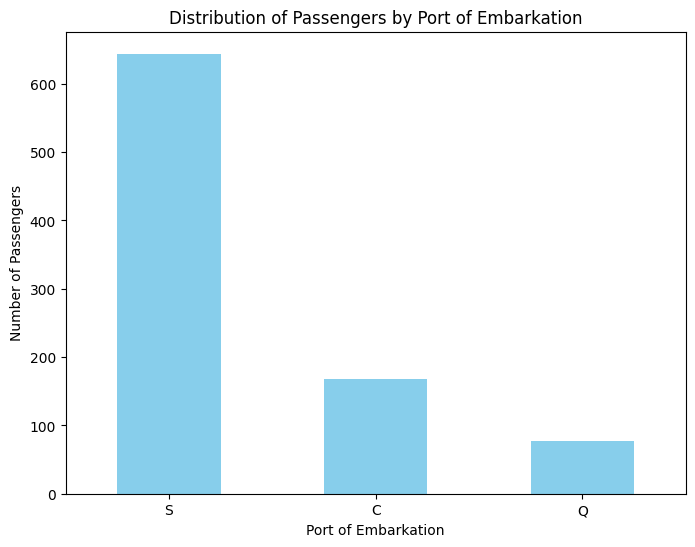

In [108]:

embarkation_counts = df['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
embarkation_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Passengers by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()


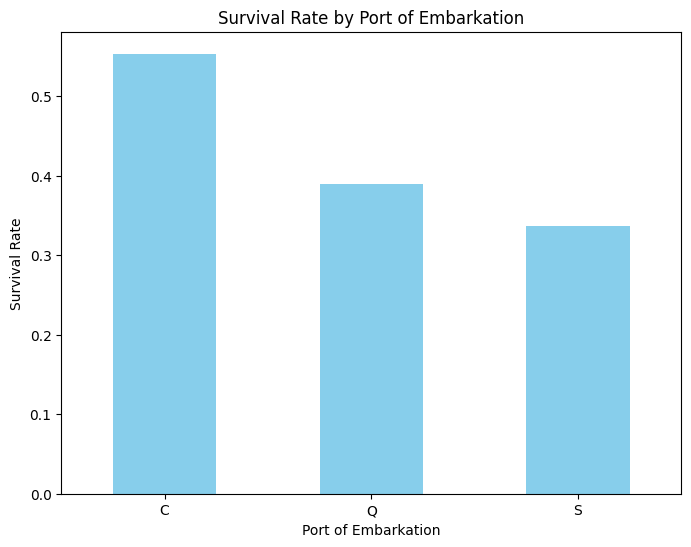

In [109]:
survival_rates = df.groupby('Embarked')['Survived'].mean()

# Plotting
plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

<h1>Additional Insights</h1>

Survival Rates by Passenger Class: There's a clear trend indicating that passengers in higher classes (1st class) had higher survival rates compared to those in lower classes (3rd class).

Survival Rates by Gender: Female passengers had significantly higher survival rates compared to male passengers. This aligns with the "women and children first" protocol followed during the evacuation.

Survival Rates by Age: Children (particularly infants and young children) had higher survival rates compared to adults. This again reflects the prioritization of vulnerable individuals during the evacuation.

Survival Rates by Port of Embarkation: Passengers embarking from C had higher survival rates compared to others (Q and S).

Cabin Data and Survival: Passengers with available cabin data might have had higher survival rates compared to those without, indicating potential biases in the dataset or correlations between cabin location and survival.

Regarding potential biases or limitations in the dataset:

Sampling Bias: The dataset may not represent the entire population of Titanic passengers, as it includes only a subset of passengers. For example, crew members and individuals with incomplete data may be excluded.

Missing Data: There are missing values in some columns (e.g., age, cabin), which could introduce biases in the analysis. Imputation methods or careful consideration of missing data handling is necessary.

Data Collection Bias: Data collection methods or biases during the Titanic disaster itself (e.g., favoritism in allocating lifeboats) could influence the dataset's accuracy and completeness.

Socio-Economic Bias: The dataset reflects the socio-economic composition of Titanic passengers, which may introduce biases in survival analyses based on factors like passenger class or fare.

Survivor Bias: The dataset primarily includes information about survivors. This bias can affect analyses related to survival rates and may not accurately represent the experiences of non-survivors.


<h1>Visualization</h1>

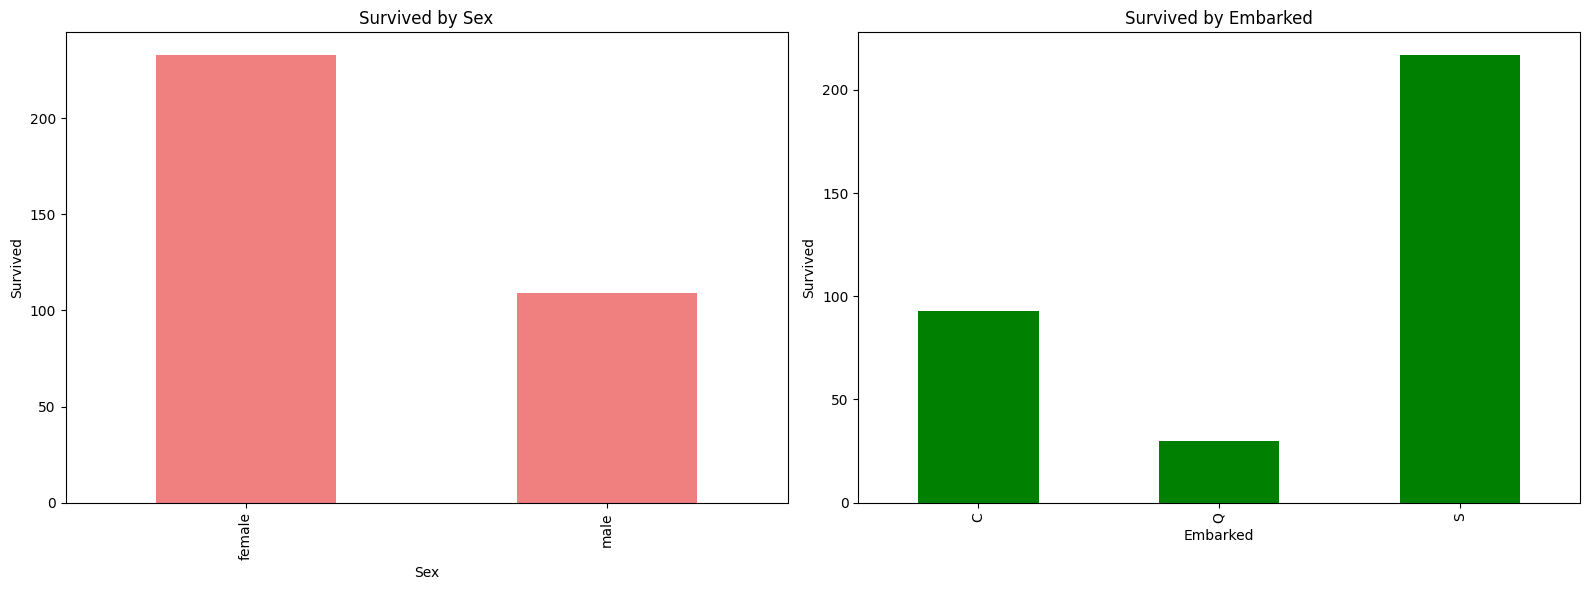

In [110]:

fig, axs = plt.subplots(1,2, figsize=(16, 6))

# Plot histograms
df.groupby('Sex')['Survived'].sum().plot(kind='bar', ax=axs[0], color='lightcoral')
axs[0].set_title('Survived by Sex')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Survived')

df.groupby('Embarked')['Survived'].sum().plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Survived by Embarked')
axs[1].set_xlabel('Embarked')
axs[1].set_ylabel('Survived')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\larai\AppData\Local\Temp\ipykernel_7976\199976242.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Range')['Survived'].sum().plot(kind='bar', ax=axs[0], color='skyblue')
C:\Users\larai\AppData\Local\Temp\ipykernel_7976\199976242.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fare Range')['Survived'].sum().plot(kind='bar', ax=axs[1], color='orange')


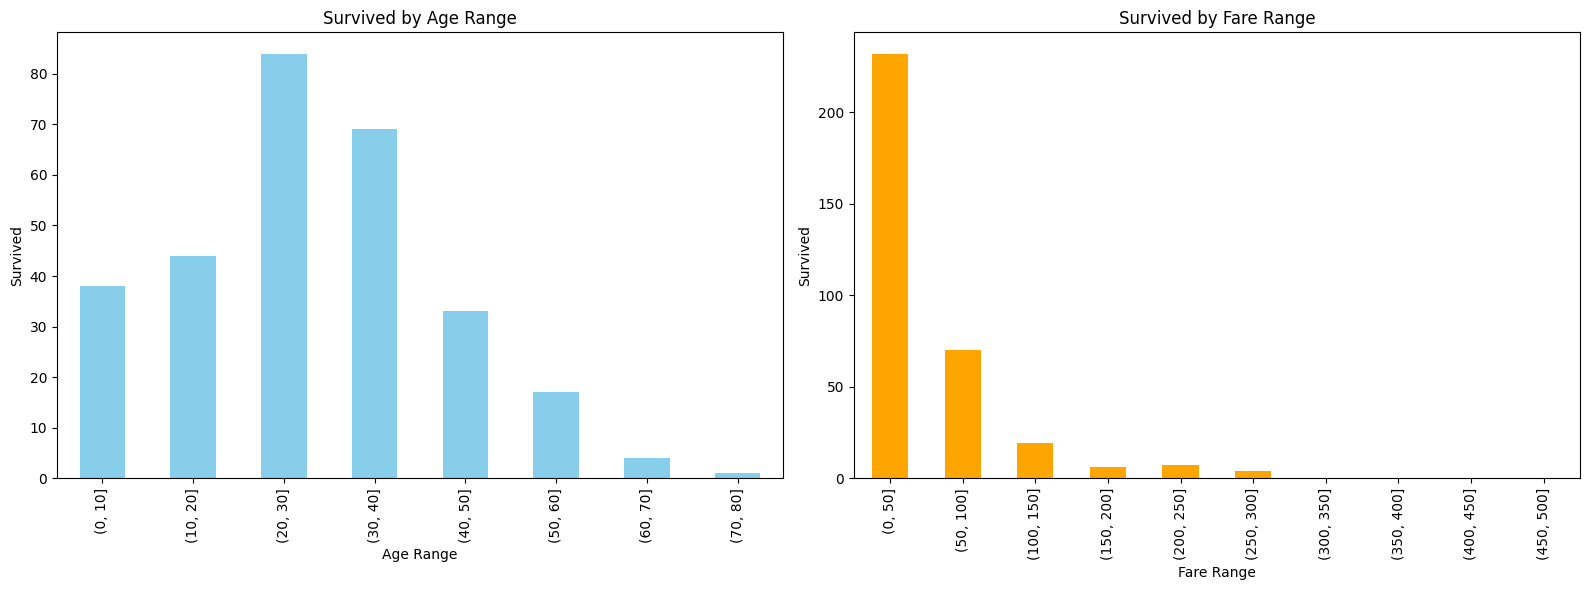

In [111]:

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

df['Age Range'] = pd.cut(df['Age'], bins=age_bins)
df['Fare Range'] = pd.cut(df['Fare'], bins=fare_bins)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

df.groupby('Age Range')['Survived'].sum().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Survived by Age Range')
axs[0].set_xlabel('Age Range')
axs[0].set_ylabel('Survived')

df.groupby('Fare Range')['Survived'].sum().plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Survived by Fare Range')
axs[1].set_xlabel('Fare Range')
axs[1].set_ylabel('Survived')

plt.tight_layout()
plt.show()
